# Netflix Data Analysis

This notebook explores Netflix's content catalog by analyzing movies and TV shows, their distribution, and trends over time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## Loading Data

We load the dataset dynamically by allowing the user to input the file path.

In [3]:
data = file_path = input("Enter the path to the Netflix dataset: ")
data = pd.read_csv(r"C:\Users\Kshit\Desktop\Data analysis\project data set\netflix1.csv")



In [4]:
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [6]:
print(data.isnull().sum())


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [7]:
data.drop_duplicates(inplace=True)


## Handling Missing Values

Instead of dropping missing values, we fill them with 'Unknown' to preserve data integrity.

In [8]:
data.dropna(subset=['director','country'],inplace=True)

In [9]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [10]:
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [ ]:
# Count the number of Movies and TV Shows

## Content Distribution

We visualize the number of Movies and TV Shows on Netflix.

In [11]:
type_counts = data['type'].value_counts()

C:\Users\Kshit\AppData\Local\Temp\ipykernel_117892\1819728433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values,


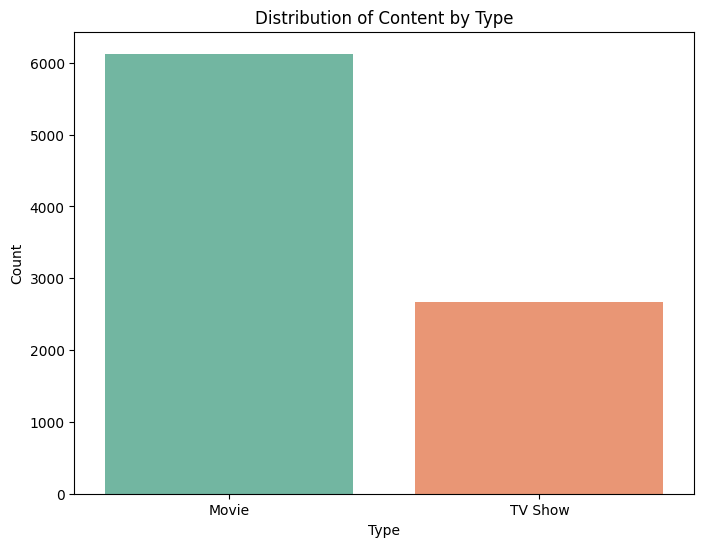

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values,
palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Most Popular Genres

We analyze the most common genres available on Netflix.

In [13]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

In [ ]:
# Plot the most common genres

C:\Users\Kshit\AppData\Local\Temp\ipykernel_117892\955158163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,palette='Set3')


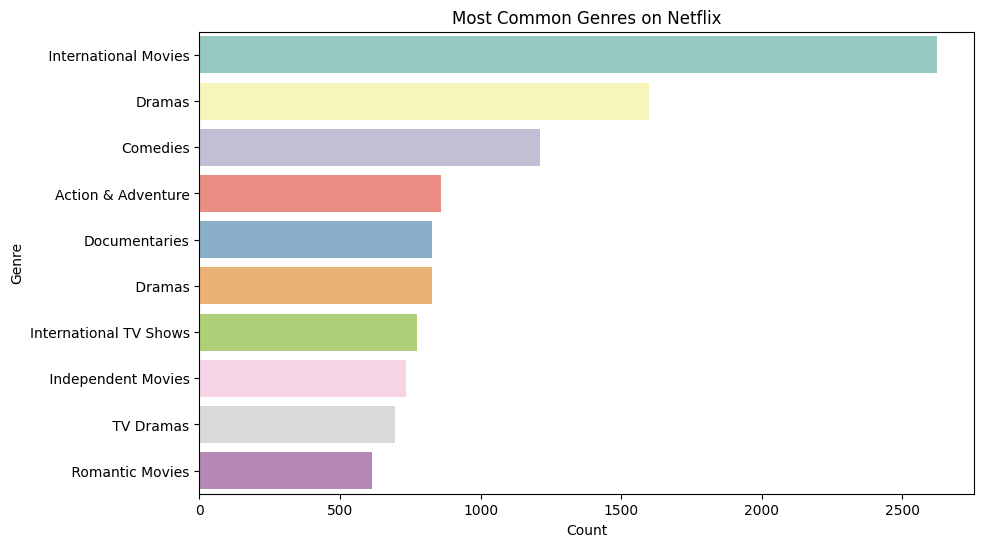

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [15]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [ ]:
# Plot content added over the years

C:\Users\Kshit\AppData\Local\Temp\ipykernel_117892\3728074568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


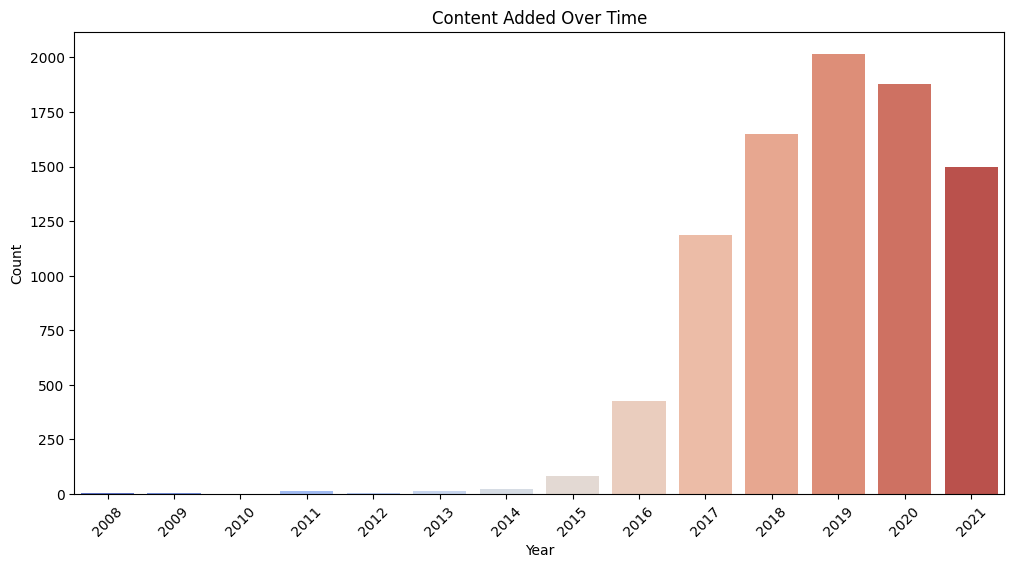

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Count titles by director

In [17]:
top_directors = data['director'].value_counts().head(10)

In [18]:
top_directors

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64

C:\Users\Kshit\AppData\Local\Temp\ipykernel_117892\2753819363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index,


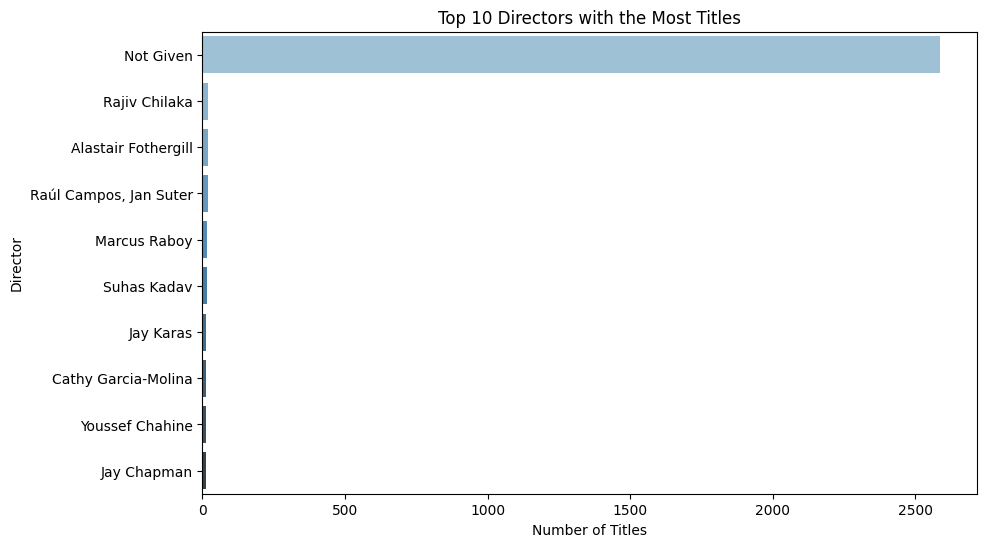

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index,
palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


In [ ]:
# Generate word cloud


In [20]:
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400,
background_color='black').generate(' '.join(movie_titles))

In [ ]:
# Plot word cloud

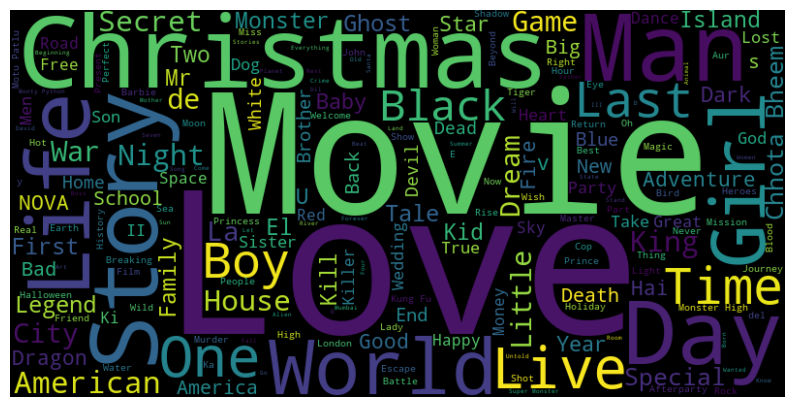

In [21]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Time-Series Analysis

We analyze how Netflix's content has grown over time by looking at the number of movies and TV shows added each year.

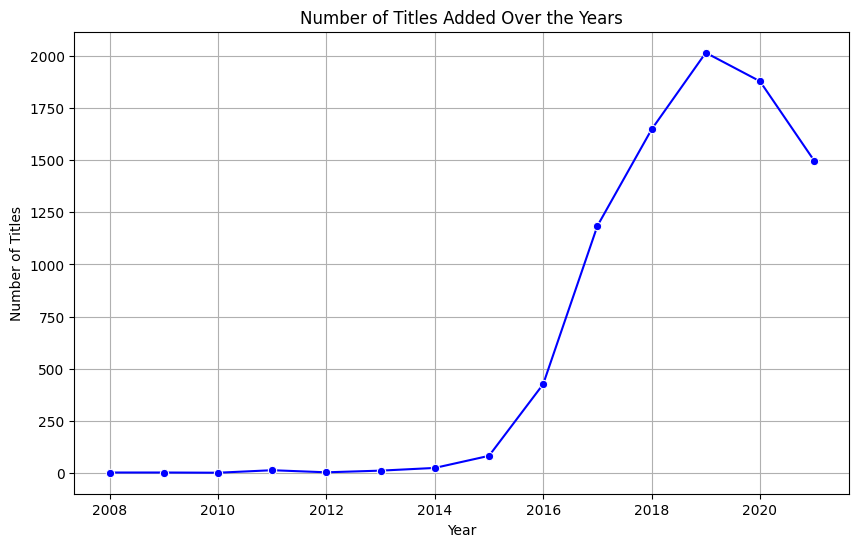

In [22]:

# Extract year from 'date_added' column
data['year_added'] = data['date_added'].dt.year

# Count the number of titles added per year
yearly_counts = data['year_added'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='b')
plt.title('Number of Titles Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


## Word Cloud of Movie Titles

We generate a word cloud to visualize the most common words in Netflix movie titles.

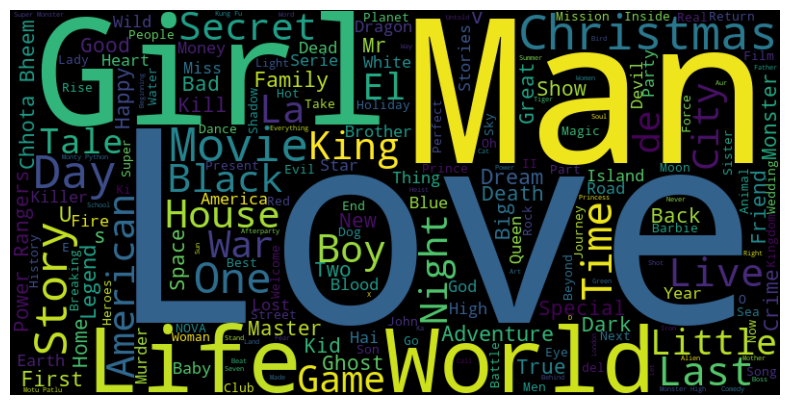

In [23]:

from wordcloud import WordCloud

# Combine all titles
text = " ".join(data['title'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
